In [92]:
import math
import random
import numpy as np
import import_ipynb
import matplotlib.pyplot as plt

from draw import draw_dot
from engine import Value

### Neuron visual representation in Convolutional Neural Network
![Neuron](neuron.jpeg)

### Simple neuron code example

In [93]:
# inputs x1, x2
x1 = Value(2.0, label = 'x1')
x2 = Value(0.0, label = 'x2')
# weights w1, w2
w1 = Value(-3.0, label = 'w1')
w2 = Value(1.0, label = 'w2')
# bias b (value for convenient manual gradient calculation)
b = Value(6.8813735870195432, label = 'b')

# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1 * w1'
x2w2 = x2*w2; x2w2.label = 'x2 * w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1w1 + x2w2'
activation = x1w1x2w2 + b; activation.label = 'activation'
output = activation.tanh(); output.label = 'output'

# automatic backprogation
output.backward()

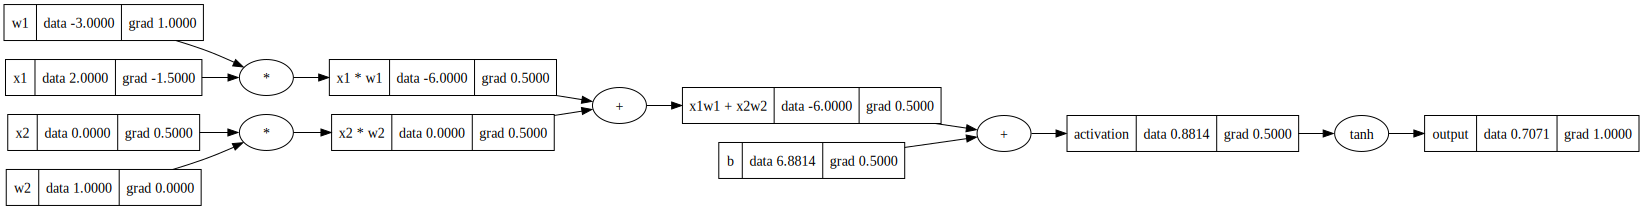

In [94]:
draw_dot(output)

### Neural Network implementation

In [95]:
class Neuron:
    
    def __init__(self, numberOfInputs):
        self.w = [Value(random.uniform(-1, 1)) for _ in range(numberOfInputs)]
        self.b = Value(random.uniform(-1, 1))
        
    # forward pass for single neuron
    def __call__(self, x):
        # activation = sum(wi * xi) + b
        activation = sum(wi * xi for wi, xi in zip(self.w, x)) + self.b
        output = activation.tanh()
        return output

In [96]:
# single neuron instance with random weights and bias
x = [2.0, 3.0]
neuron = Neuron(len(x))
neuron(x)

Value(data=0.8033883755397279)

In [97]:
# layer of neurons is just a list of neurons equal to numberOfOutputs, where numberOfInputs means how many inputs each neuron in layer has
class Layer:
    
    def __init__(self, numberOfInputs, numberOfOutputs):
        self.neurons = [Neuron(numberOfInputs) for _ in range(numberOfOutputs)]
        
    # forward pass for layer, takes list of inputs and returns list of outputs
    def __call__(self, inputs):
        print("Layer inputs: ", inputs)
        outputs = [neuron(inputs) for neuron in self.neurons]
        return outputs[0] if len(outputs) == 1 else outputs

In [98]:
# single layer of 4 neurons where each neuron has 3 inputs equal to x
x = [2.0, 3.0, 4.0]
layer = Layer(len(x), 4)
layer(x)

Layer inputs:  [2.0, 3.0, 4.0]


[Value(data=0.6303489020703303),
 Value(data=-0.999607603435123),
 Value(data=0.9887234267017443),
 Value(data=-0.9999178789934481)]

In [99]:
class MultiLayerPerceptron:
    
    def __init__(self, inputLayerSize, hiddenLayerSizes):
        # create layerSizes list from value inputLayerSize and concatenate it with hiddenLayerSizes
        layerSizes = [inputLayerSize] + hiddenLayerSizes
        print(layerSizes)
        self.layers = [Layer(layerSizes[i], layerSizes[i+1]) for i in range(len(layerSizes)-1)]
        
    def __call__(self, inputs):
        # call each layer with inputs and set outputs as new inputs for next layer
        for layer in self.layers:
            outputs = layer(inputs)
            inputs = outputs
        return outputs

### Simple Neural Network visual representation with corresponding code example
![Neural_network](neural_network.jpeg)

In [100]:
inputs = [2.0, 3.0, 4.0]
mlp = MultiLayerPerceptron(len(inputs), [4, 4, 1])
mlp(inputs)

[3, 4, 4, 1]
Layer inputs:  [2.0, 3.0, 4.0]
Layer inputs:  [Value(data=-0.9067207812284069), Value(data=0.9847884252920042), Value(data=0.9998047750011286), Value(data=-0.9961885139186977)]
Layer inputs:  [Value(data=-0.5714987944142765), Value(data=-0.5106995086181659), Value(data=0.29565916413275073), Value(data=0.9950342066248757)]


Value(data=0.14128273780033987)